# Red Wine Quality Classifier
## Introduction:
Red wine is a popular type of wine made from dark-colored grapes, known for its rich flavor and complexity. Wine quality is typically evaluated based on factors such as aroma, taste, and acidity, etc. We use this dataset to address: “how can a business predict the quality of wine they produce based on its chemical composition by using this dataset?”


There are 12 input variables in this dataset based on physicochemical tests: 

  1 - fixed acidity ((grams of tartaric acid)/dm3)
  
  2 - **volatile acidity** ((grams of acetic acid)/dm3)    
  
  3 -  **citric acid** (g/dm3)
  
  4 - **residual sugar** (g/dm3)
  
  5 - chlorides(In grams of sodium chloride per cubic decimetre)    
  
  6 - free sulfur dioxide (mg/dm3)
  
  7 - total sulfur dioxide (mg/dm3)
  
  8 - density (g/cm3)
  
  9 - **pH**
  
  10 - **sulphates** ((grams of potassium sulphate)/dm3)
  
  11 - **alcohol** (%)
  
    Output variable (based on sensory rating): 
  12 - **quality** (between 0-10): Sensory rating by human experts.
 
## Methods:
In figure 1, we created a series of correlation graphs with each variable in the original data set. We observed how each variable had an impact on the classification of the quality of the wine, where ranges shaded red were classified as “bad” wine, ranges shaded blue were classified as “excellent” wine, and regions shaded green were classified as “good” wine. From here we analyzed which variables provided distinct groupings based on quality, to see which columns would be good predictor variables and train the classifier to be more accurate. From the analysis described above, we chose to use the columns we will use when classifying will be volatile acidity, citric acid, Sulphates, and Alcohol as prediction variables and quality as the response variable. Based on the distribution of 1-10 quality, we will categorize quality as a factor between "bad", "moderate", and "good".

After wrangling the dataset and visualizing the distribution of observations based on ___ in figures ___, we can move on to creating the KNN classifier model. Since our data is on a bell curve and there are a high number of moderate observations compared to others, we wanted to rebalance the data and added an oversampling step into our recipe. We will split the dataset into 75% training and 25% test set use the training set to preprocess and create model specification. Next use cross-validation on training set to determine the best K nearest-neighbor value to use when creating a classifier, which ensures the highest prediction accuracy. Lastly, use the tuned classifier with the K value that gives the highest prediction accuracy on the testing set to predict the quality of an unclassified wine. Using the testing set, we can check the metrics for the model to see how accurate its predictions are.

#!!!
Visualize the results by plotting bar graphs for each quality factor 

## Expected outcomes and significance:
In this research, we expected to find which physicochemical properties make high-quality red wine, and what chemical compositions are required for high-quality red wine. Once we know what physicochemical properties contribute to a good quality score, businesses will be able to use this information to help them produce higher-quality wine. Based on our findings, we came up with two questions that can be worked on in the future:
“How can the results of this study affect wine manufacturing processes to ensure higher quality?”
“How can the results of this analysis affect pricing strategies for wine?”

Discussion:
summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?


### Citation
Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547–553. https://doi.org/10.1016/j.dss.2009.05.016 

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.



## Preliminary exploratory data analysis: 

In [7]:
install.packages("themis")
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(themis)
library(GGally)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
options(repr.matrix.max.rows = 7)

wine_quality <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delim = ";")
colnames(wine_quality) <- make.names(colnames(wine_quality))
wine_quality

wine_quality <- mutate(wine_quality, across(-quality, as.numeric, na.rm = TRUE)) |>
                 mutate(new_quality = case_when(
                             quality <= 4 ~ "bad",
                             between(quality, 5, 6) ~ "moderate",
                             quality >= 7 ~ "good",
                             TRUE ~ "")) |>
                 arrange(quality)
wine_quality

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,new_quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
11.6,0.580,0.66,2.20,0.074,10,47,1.00080,3.25,0.57,9.0,3,bad
10.4,0.610,0.49,2.10,0.200,5,16,0.99940,3.16,0.63,8.4,3,bad
7.4,1.185,0.00,4.25,0.097,5,14,0.99660,3.63,0.54,10.7,3,bad
10.4,0.440,0.42,1.50,0.145,34,48,0.99832,3.38,0.86,9.9,3,bad
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.2,0.33,0.33,1.7,0.061,3,13,0.99600,3.23,1.10,10.0,8,good
7.2,0.38,0.31,2.0,0.056,15,29,0.99472,3.23,0.76,11.3,8,good
7.4,0.36,0.30,1.8,0.074,17,24,0.99419,3.24,0.70,11.4,8,good


### Explanations 

Summary table including mean column values, grouped by quality.
Plot of number of observations for each quality of wine.

Scatter plots of the distribution for each predictor, showing where the data lies for each wine quality. This will help determine what values for each physiochemical property contribute to a better quality wine.

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,new_quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.6,0.580,0.66,2.20,0.074,10,47,1.00080,3.25,0.57,9.0,bad
10.4,0.610,0.49,2.10,0.200,5,16,0.99940,3.16,0.63,8.4,bad
7.4,1.185,0.00,4.25,0.097,5,14,0.99660,3.63,0.54,10.7,bad
10.4,0.440,0.42,1.50,0.145,34,48,0.99832,3.38,0.86,9.9,bad
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.2,0.33,0.33,1.7,0.061,3,13,0.99600,3.23,1.10,10.0,good
7.2,0.38,0.31,2.0,0.056,15,29,0.99472,3.23,0.76,11.3,good
7.4,0.36,0.30,1.8,0.074,17,24,0.99419,3.24,0.70,11.4,good


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



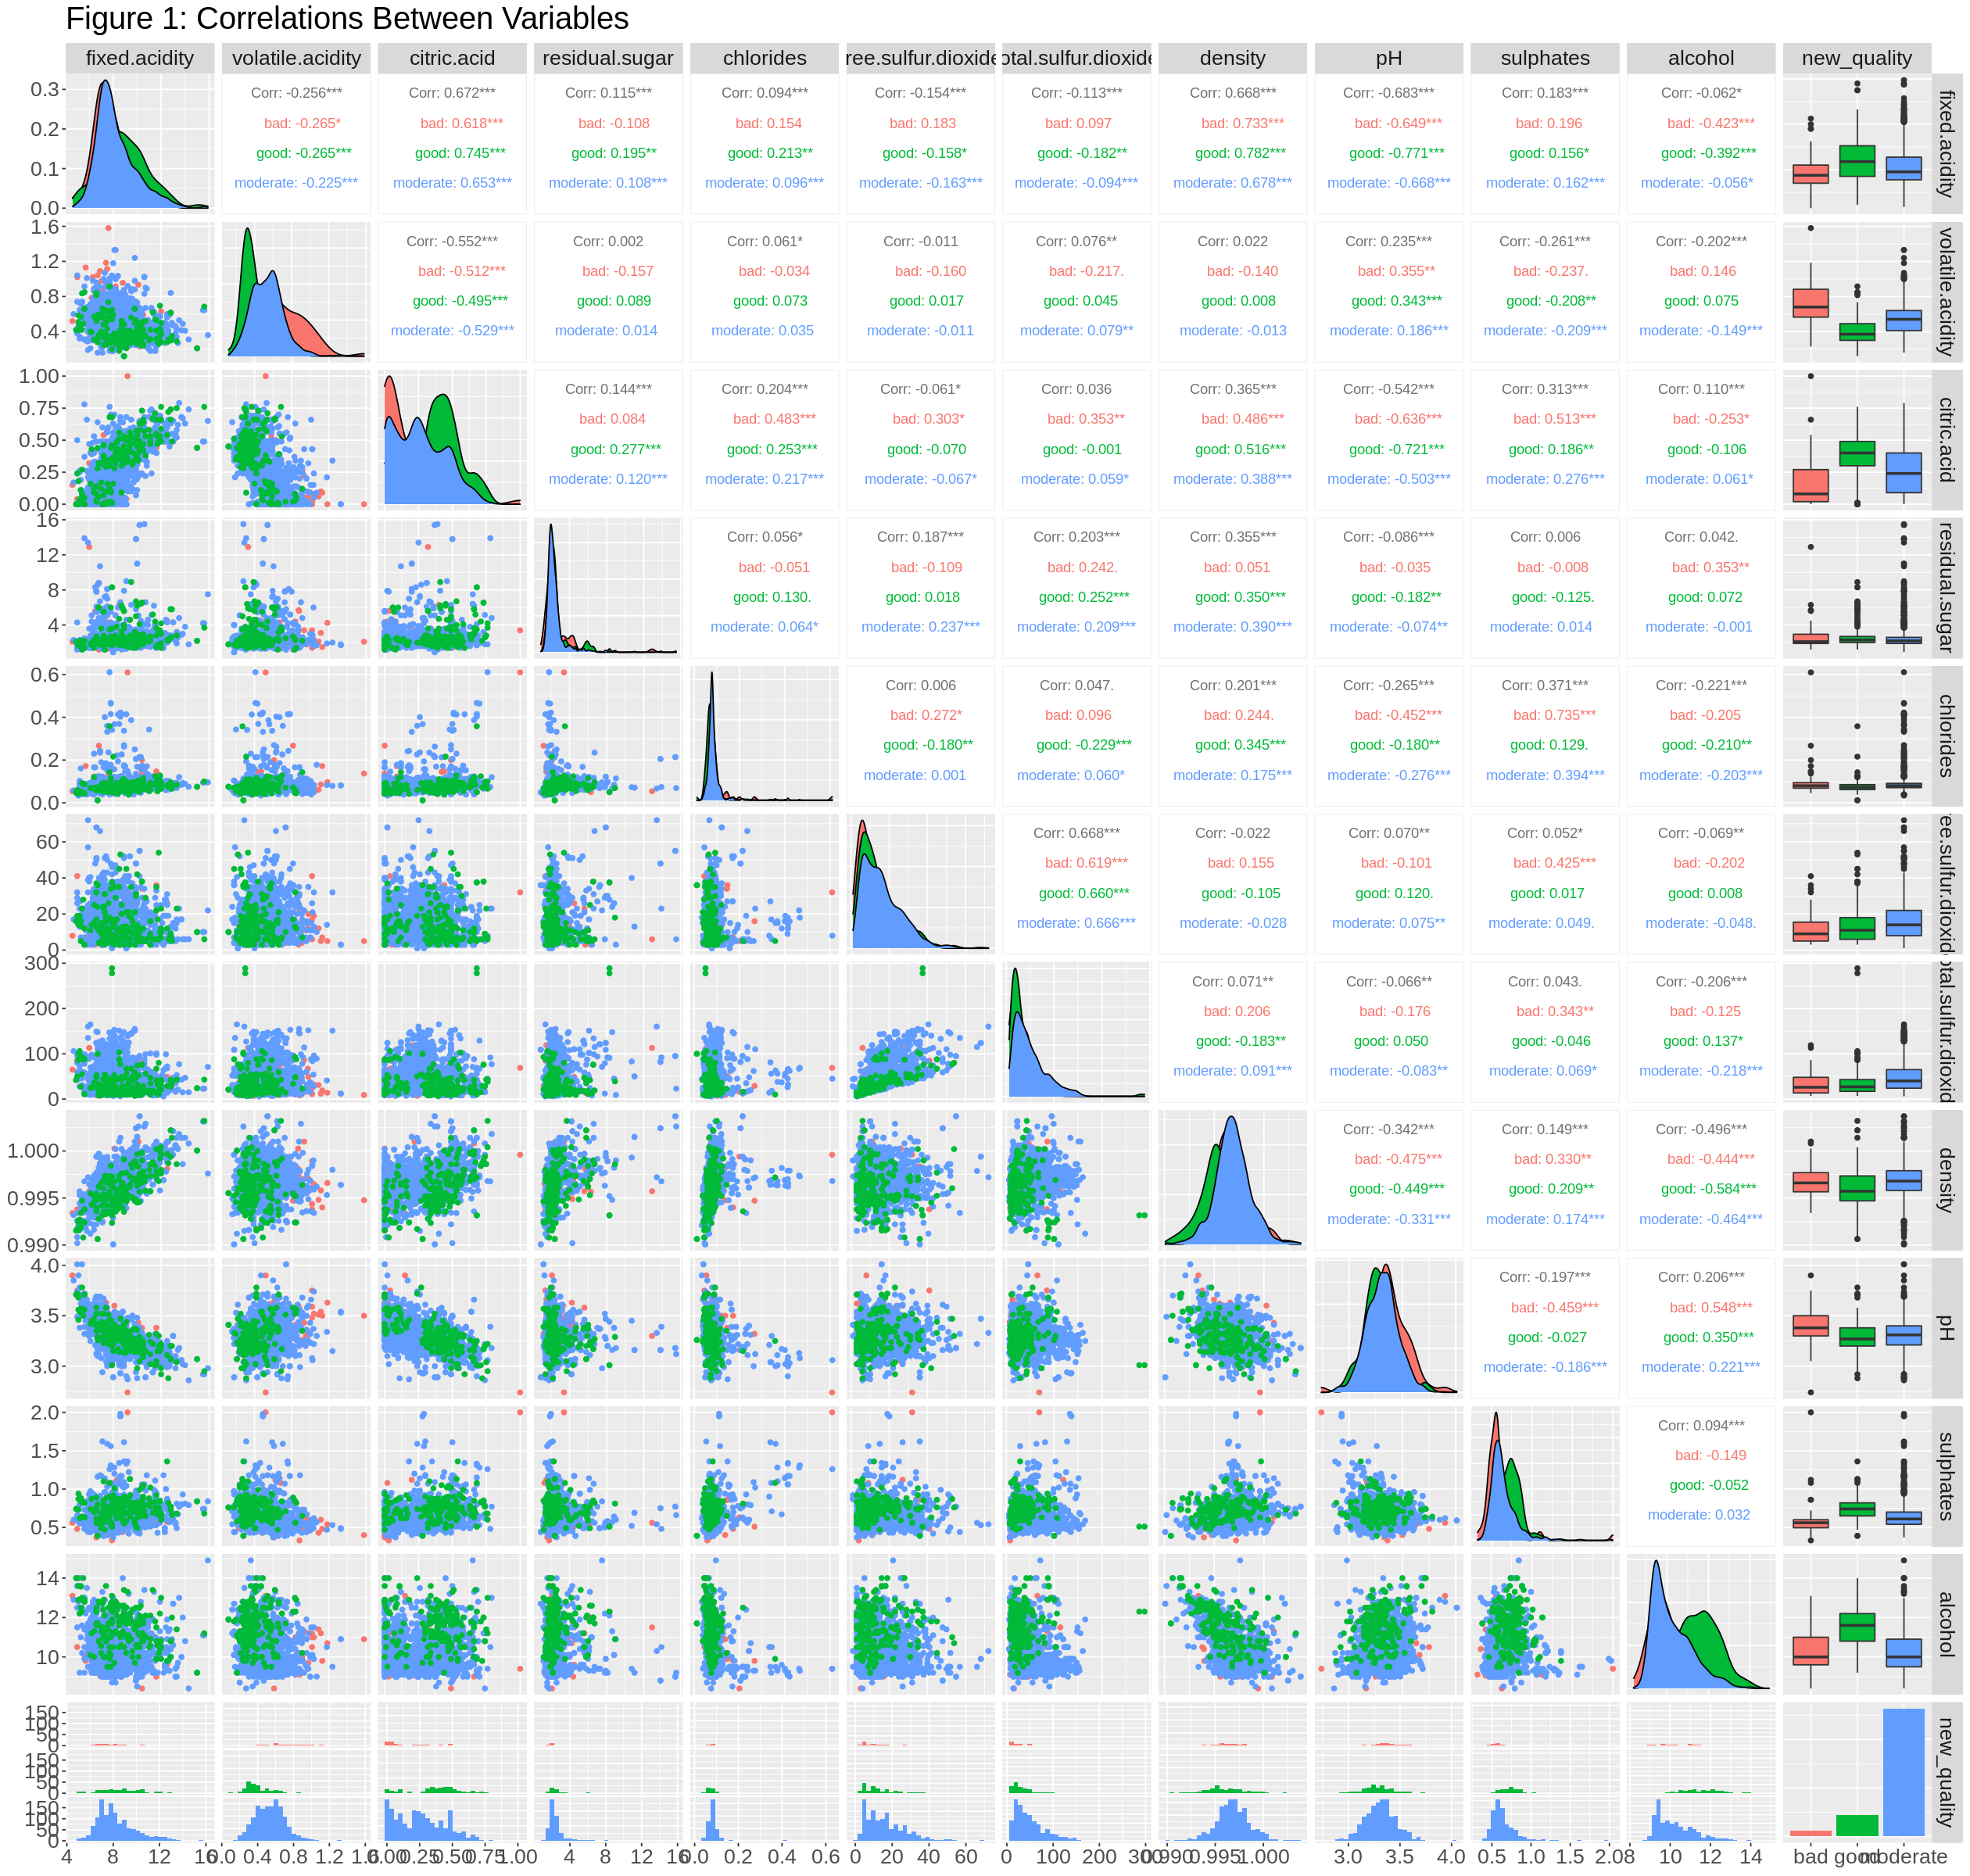

In [9]:
# correlations between variables
options(repr.plot.height = 20, repr.plot.width = 21)
library(ggplot2)

wine_quality_factored <- mutate(wine_quality, new_quality = as.factor(new_quality)) |>
select(-quality)
wine_quality_factored

wine_pairs <- ggpairs(wine_quality_factored, columns = 1:12, aes(color = new_quality )) +
                ggtitle("Figure 1: Correlations Between Variables") +
                theme(text = element_text(size = 20))
wine_pairs

new_quality,mean_citric,mean_acidity,mean_alcohol,mean_sulphates
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
bad,0.1736508,0.7242063,10.21587,0.5922222
good,0.3764977,0.4055300,11.51805,0.7434562
moderate,0.2582638,0.5385595,10.25272,0.6472631


quality,observations
<dbl>,<int>
3,10
4,53
5,681
6,638
7,199
8,18


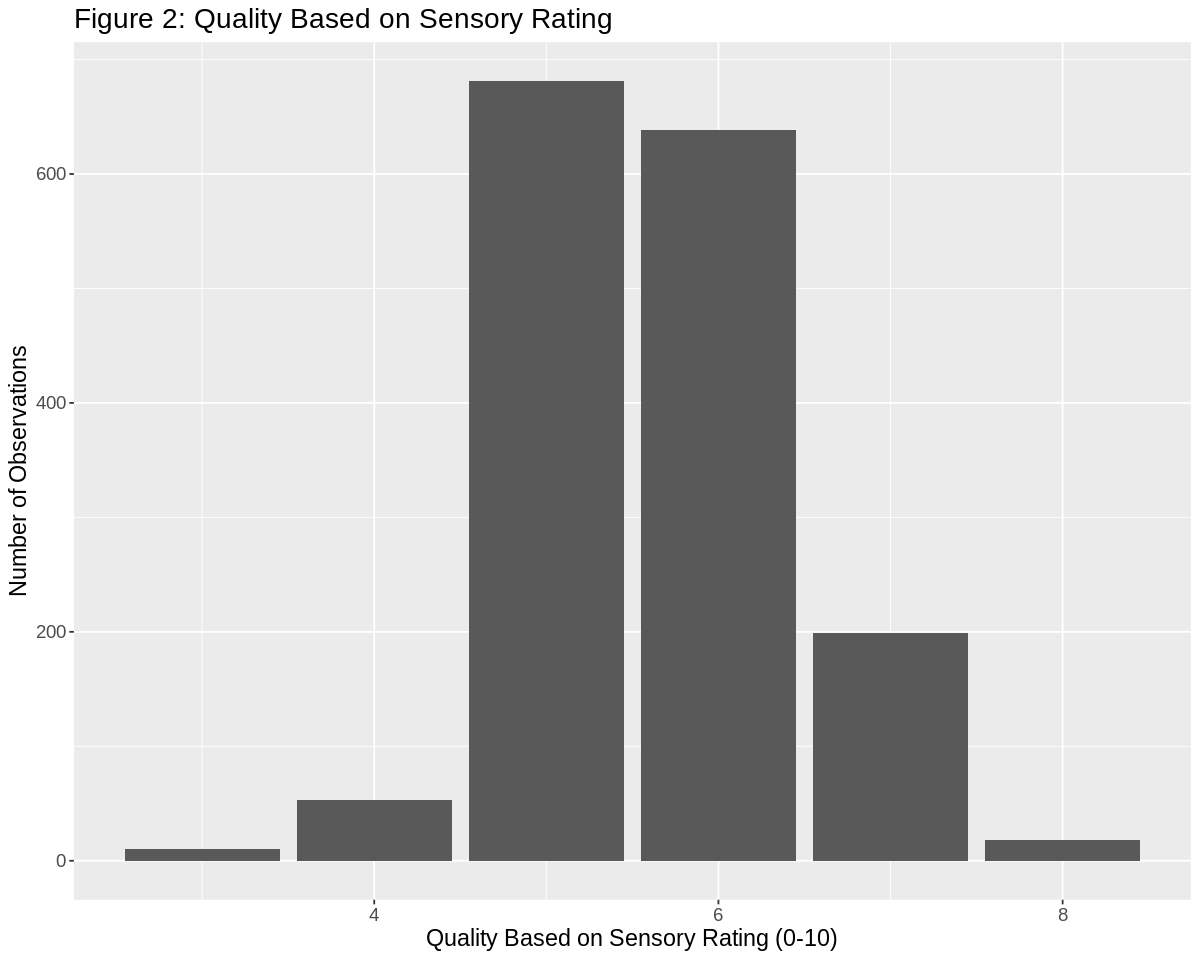

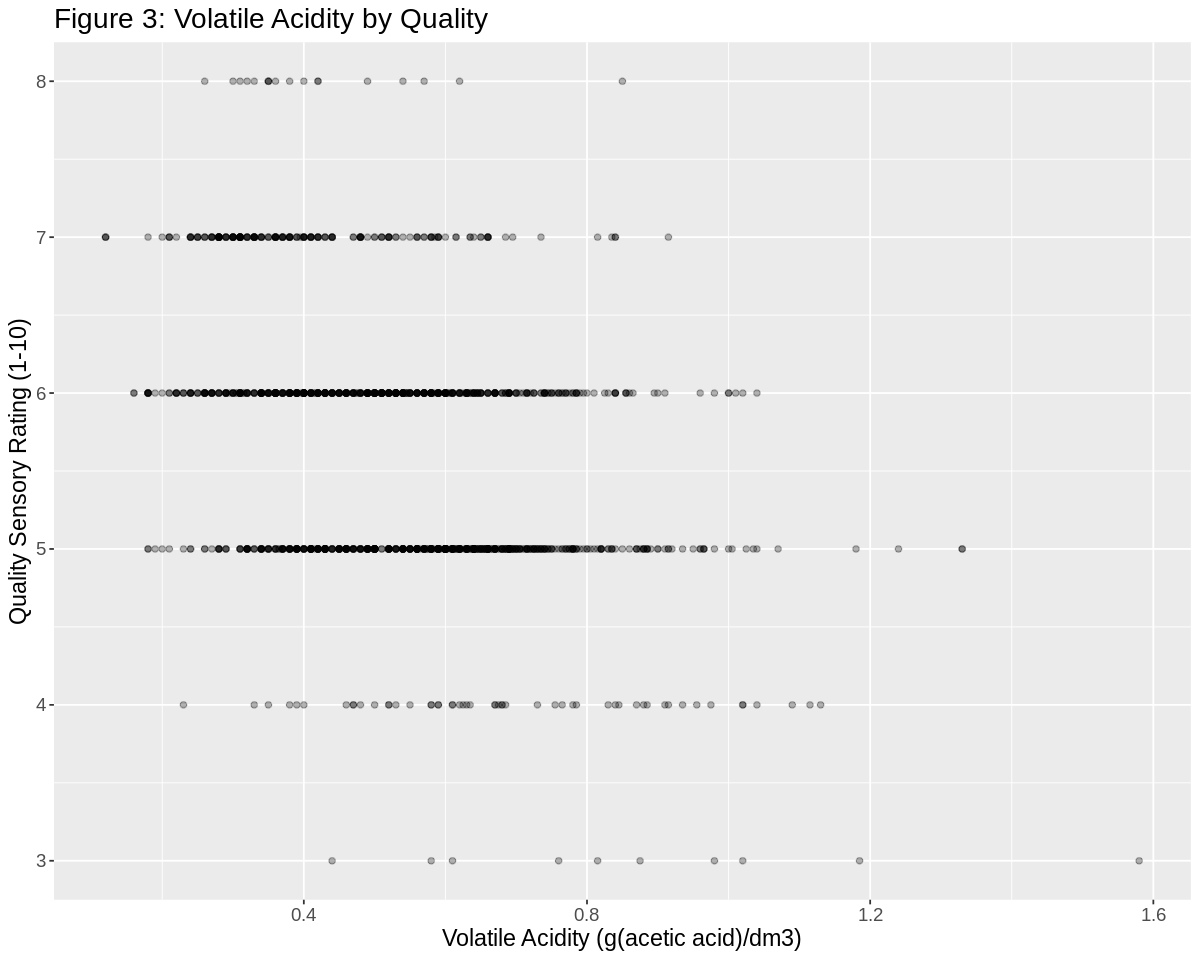

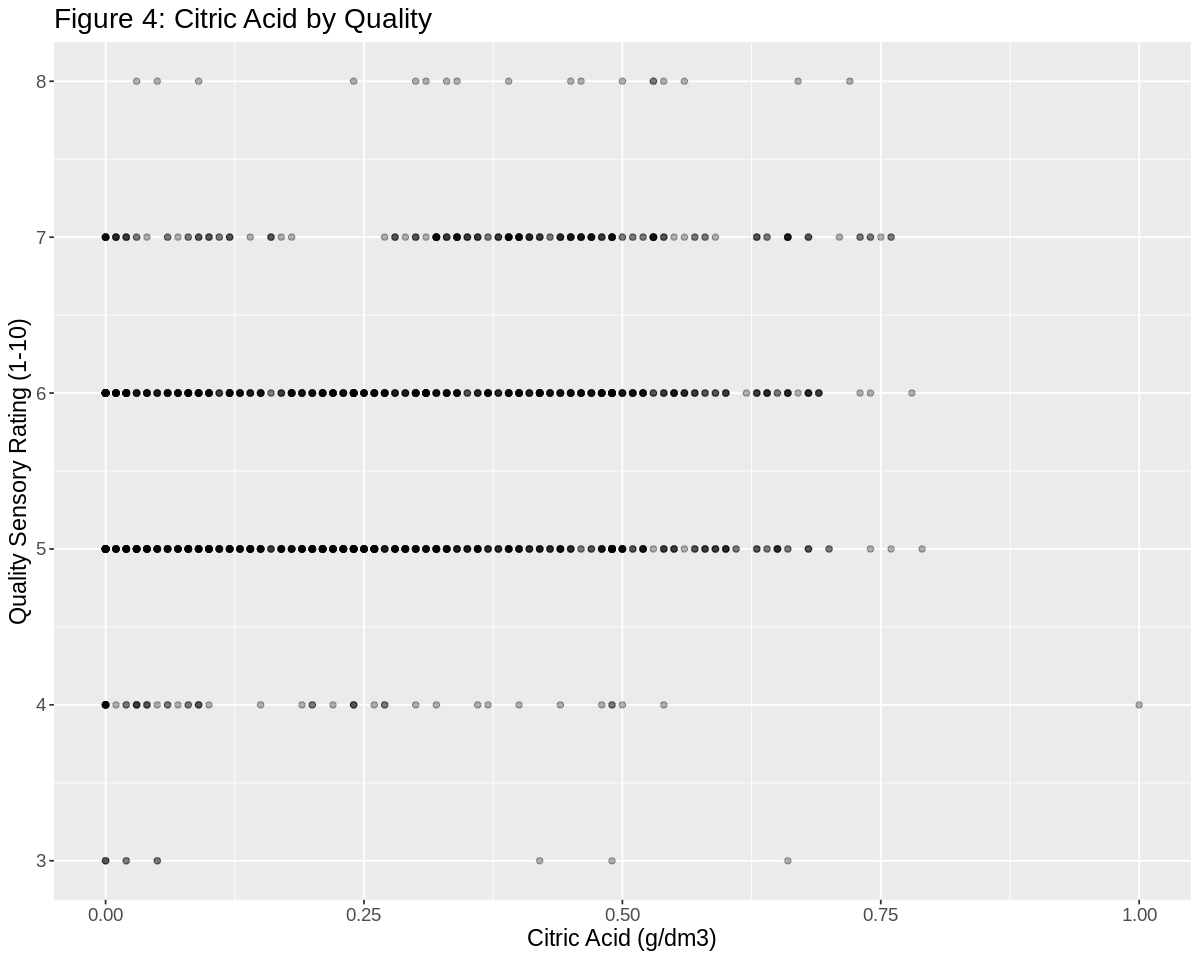

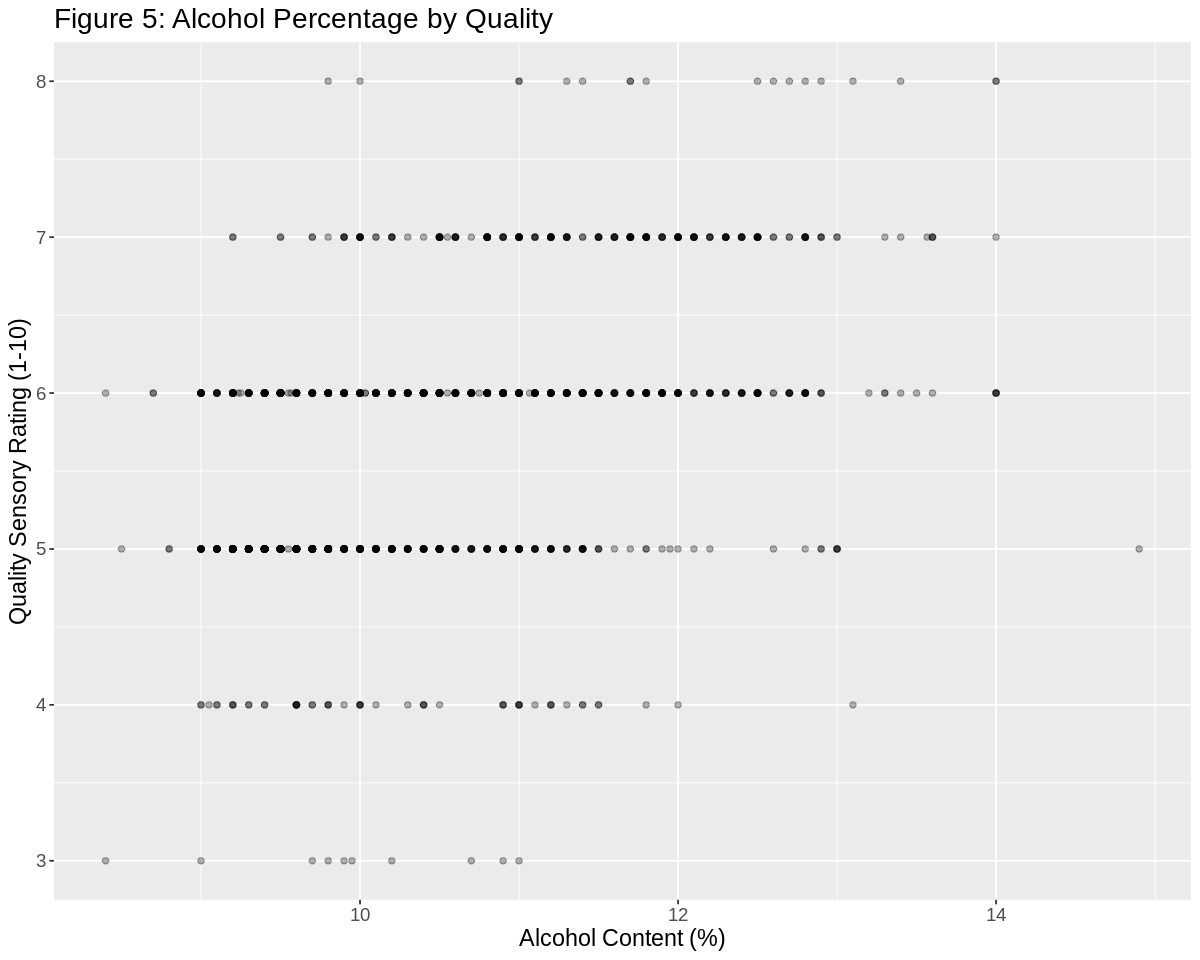

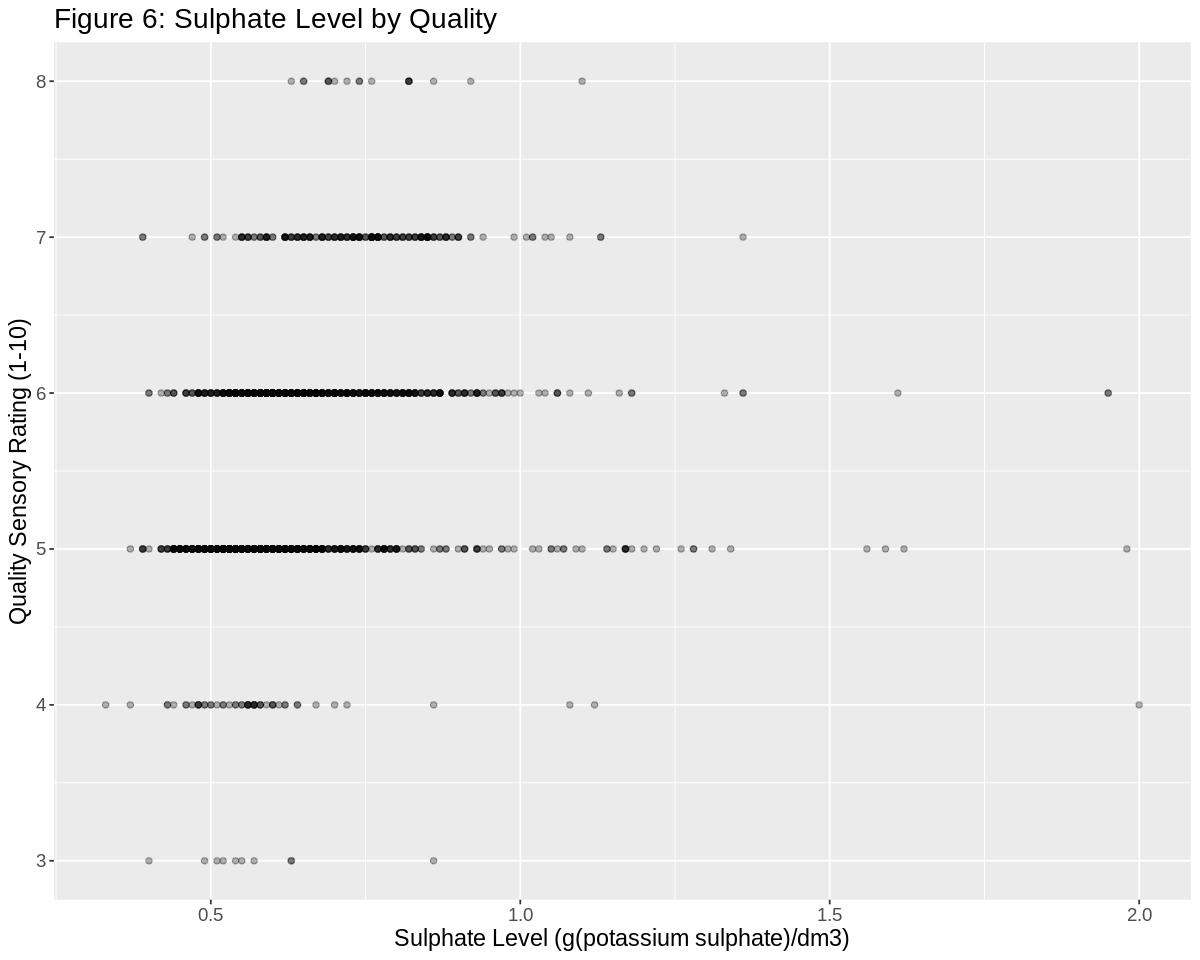

In [10]:
library(RColorBrewer)

wine_summary <- group_by(wine_quality, new_quality) |>
                summarize(mean_citric = mean(citric.acid), 
                          mean_acidity = mean(volatile.acidity), 
                          mean_alcohol = mean(alcohol),
                         mean_sulphates = mean(sulphates))
wine_summary

wine_grouped <- group_by(wine_quality, quality) |>
                summarize(observations = n())
wine_grouped

options(repr.plot.width = 10, repr.plot.height = 8)
quality_num_plot <- ggplot(wine_grouped, aes(x = quality, y = observations)) +
                        geom_bar(stat = "identity") +
                        xlab("Quality Based on Sensory Rating (0-10)") +
                        ylab("Number of Observations") + 
                        ggtitle("Figure 2: Quality Based on Sensory Rating") +
                        theme(text = element_text(size=14))
quality_num_plot

acidity_quality_plot <- ggplot(wine_quality, aes(x = volatile.acidity, y = quality)) +
                        geom_point(alpha = 0.3) +
                        labs(x = "Volatile Acidity (g(acetic acid)/dm3)", 
                         y = "Quality Sensory Rating (1-10)", 
                         title = "Figure 3: Volatile Acidity by Quality") +
                        theme(text = element_text(size=14))
acidity_quality_plot

citric_quality_plot <- ggplot(wine_quality, aes(x = citric.acid, y = quality)) +
                        geom_point(alpha = 0.3) +
                        labs(x = "Citric Acid (g/dm3)", 
                         y = "Quality Sensory Rating (1-10)", 
                         title = "Figure 4: Citric Acid by Quality") +
                        theme(text = element_text(size=14))
citric_quality_plot


alc_quality_plot <- ggplot(wine_quality, aes(x = alcohol, y = quality)) +
                        geom_point(alpha = 0.3) +
                        labs(x = "Alcohol Content (%)", 
                         y = "Quality Sensory Rating (1-10)", 
                         title = "Figure 5: Alcohol Percentage by Quality") +
                        theme(text = element_text(size=14))
alc_quality_plot

sulph_quality_plot <- ggplot(wine_quality, aes(x = sulphates, y = quality)) +
                        geom_point(alpha = 0.3) +
                        labs(x = "Sulphate Level (g(potassium sulphate)/dm3)", 
                         y = "Quality Sensory Rating (1-10)", 
                         title = "Figure 6: Sulphate Level by Quality") +
                        theme(text = element_text(size=14))
sulph_quality_plot

In [11]:
data_split <- initial_split(wine_quality_factored, prop = 0.75, strata = new_quality) 
data_train <- training(data_split)
data_test <- testing(data_split)

In [12]:
my_recipe <- recipe(new_quality ~ . , data = data_train) |> 
    step_scale(all_predictors()) |> 
    step_center(all_predictors()) |>
    step_upsample(new_quality , over_ratio = 1.5, skip = TRUE)
   

# specification
knn_spec <- nearest_neighbor(weight_func =  "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |>
    set_mode("classification")

# vfold
my_vfold <- vfold_cv(data_train, v = 5, strata = new_quality)

# k_values
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

# k validations
knn_fit <- workflow() |>
    add_recipe(my_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = my_vfold, grid = k_vals) |>
    collect_metrics()

knn_fit

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7846220,5,0.007899496,Preprocessor1_Model01
1,roc_auc,hand_till,0.6320705,5,0.015615339,Preprocessor1_Model01
3,accuracy,multiclass,0.7462672,5,0.007849197,Preprocessor1_Model02
3,roc_auc,hand_till,0.6538847,5,0.015895035,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,roc_auc,hand_till,0.7563528,5,0.01456628,Preprocessor1_Model24
49,accuracy,multiclass,0.5275594,5,0.01249411,Preprocessor1_Model25
49,roc_auc,hand_till,0.7593597,5,0.01325019,Preprocessor1_Model25


In [19]:
df_knn_fit <- knn_fit |>
    arrange(desc(mean))
    
 df_knn_fit[ df_knn_fit$.metric == "accuracy", ]

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7846220,5,0.007899496,Preprocessor1_Model01
3,accuracy,multiclass,0.7462672,5,0.007849197,Preprocessor1_Model02
5,accuracy,multiclass,0.7137147,5,0.008574188,Preprocessor1_Model03
7,accuracy,multiclass,0.6836518,5,0.006349171,Preprocessor1_Model04
⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,accuracy,multiclass,0.5342401,5,0.01024991,Preprocessor1_Model23
49,accuracy,multiclass,0.5275594,5,0.01249411,Preprocessor1_Model25
47,accuracy,multiclass,0.5275525,5,0.01468255,Preprocessor1_Model24


In [20]:
knn_spec2 <- nearest_neighbor(weight_func =   "rectangular", neighbors =6) |>
set_engine("kknn") |>
set_mode("classification")
#creating second specification with neighbors value decided from above

knn_fit2 <- workflow() |>
add_recipe(my_recipe) |>
add_model(knn_spec2) |>
fit(data = data_train)
knn_fit2

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_scale()
• step_center()
• step_upsample()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(6,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.07475158
Best kernel: rectangular
Best k: 6

In [21]:
#testing classifier on test data set
#testing the accuracy of the model on the test data set
data_test_predictions <- predict(knn_fit2, data_test) |>
    bind_cols(data_test) 
data_test_predictions

.pred_class,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,new_quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
bad,7.4,1.185,0.00,4.25,0.097,5,14,0.9966,3.63,0.54,10.7,bad
bad,8.8,0.610,0.30,2.80,0.088,17,46,0.9976,3.26,0.51,9.3,bad
good,5.0,1.020,0.04,1.40,0.045,41,85,0.9938,3.75,0.48,10.5,bad
moderate,7.6,0.680,0.02,1.30,0.072,9,20,0.9965,3.17,1.08,9.2,bad
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
good,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,good
good,8.6,0.42,0.39,1.8,0.068,6,12,0.99516,3.35,0.69,11.7,good
good,7.2,0.38,0.31,2.0,0.056,15,29,0.99472,3.23,0.76,11.3,good


In [16]:
write_csv(data_test_predictions, "test_predictions.csv")

In [17]:
# Compare the accuracy of predictions to the true values in the test set
accuracies <- data_test_predictions |> 
    metrics(truth = new_quality, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
accuracies

# Compare the predictions to the true values in a confusion matrix
wine_cm <- data_test_predictions |> 
    conf_mat(truth = new_quality, estimate = .pred_class)
wine_cm

.metric,.estimate
<chr>,<dbl>
accuracy,0.7705736


          Truth
Prediction bad good moderate
  bad        4    0       17
  good       1   45       58
  moderate   4   12      260

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



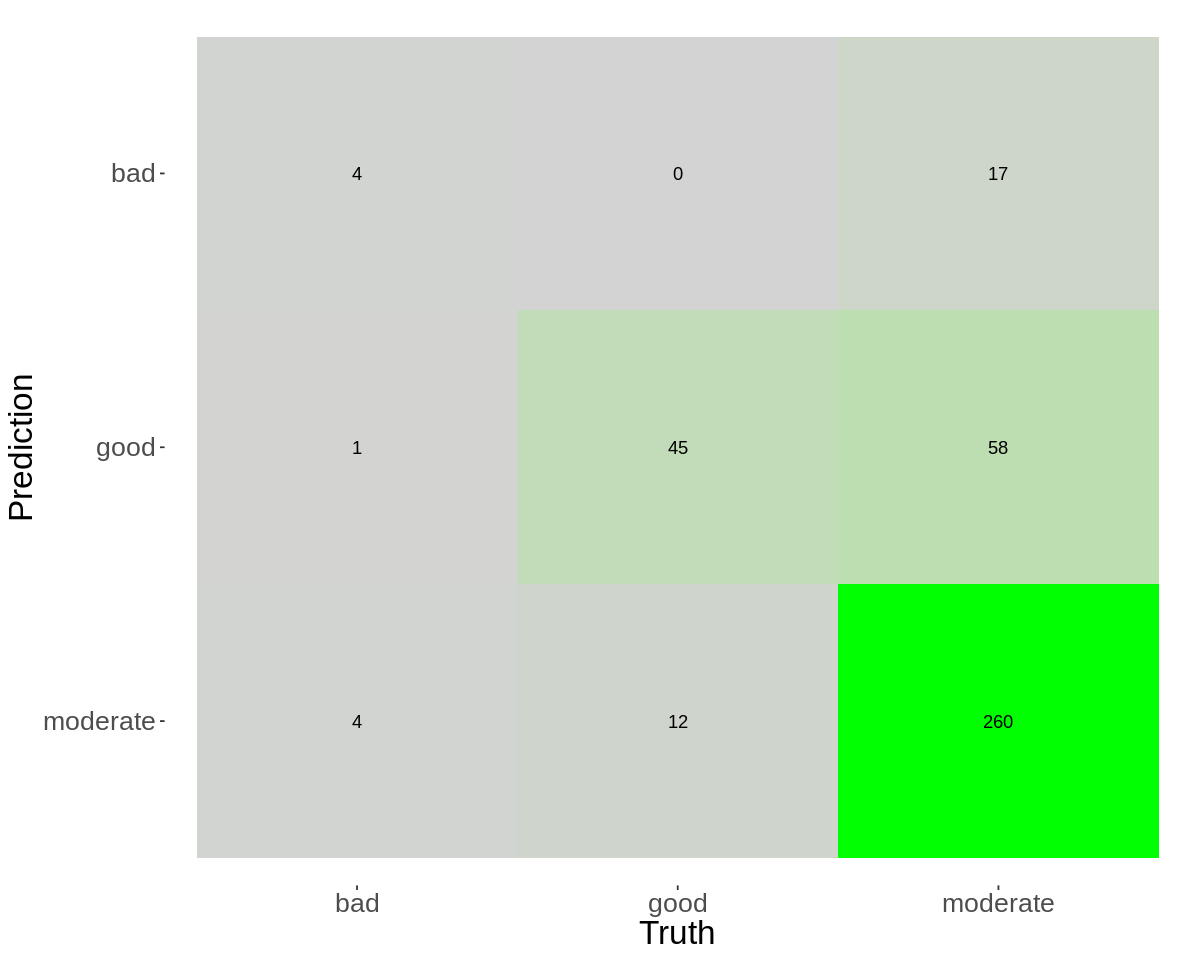

In [18]:
# loading necessary libraries
library(yardstick)
library(ggplot2)

options(repr.plot.width = 10, repr.plot.height = 8)
cf_plot <- autoplot(wine_cm, type = "heatmap") +
    scale_fill_gradient(low = "light gray", high = "green") +
    theme(text = element_text(size = 20))
cf_plot

In [1]:
#accuracy of the model
accuracies <- knn_fit |>
                 filter(.metric == 'accuracy')

#the visulization for k-values and accuracy -> to choose the best K
k_accuracy_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +

k_accuracy_plot
                   

ERROR: Error in as.ts(x): object 'knn_fit' not found
